In [41]:

import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
data_dir = os.path.join(os.getcwd(),'data')
PRSA = pd.read_csv(os.path.join(data_dir,"PRSA_Data.csv"), index_col=0)
PRSA[PRSA == -1] = np.nan
PRSA

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted
...,...,...,...,...,...,...,...,...,...,...
35059,35060,4.0,20.0,300.0,81.053452,1011.9,0.0,N,2.0,Heavily Polluted
35060,35061,6.0,55.0,500.0,44.645126,1012.3,0.0,WSW,1.0,Severely Polluted
35061,35062,7.0,48.0,500.0,47.567265,1012.8,0.0,N,1.1,Severely Polluted
35062,35063,5.0,47.0,500.0,49.764297,1012.9,0.0,NNE,1.0,Severely Polluted


# 1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

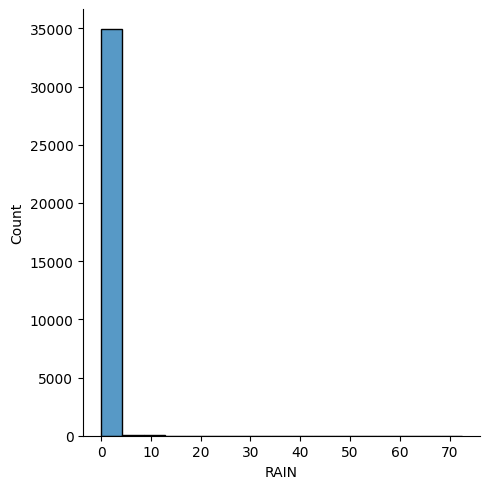

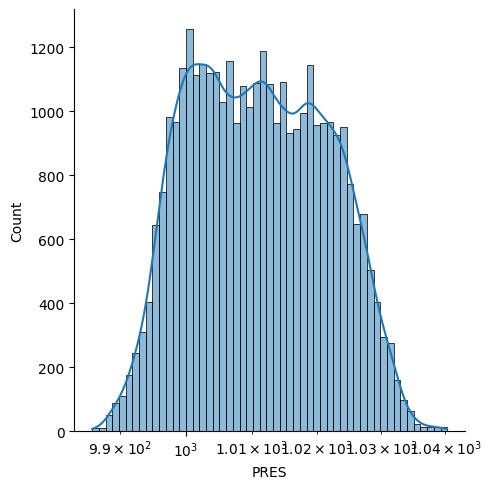

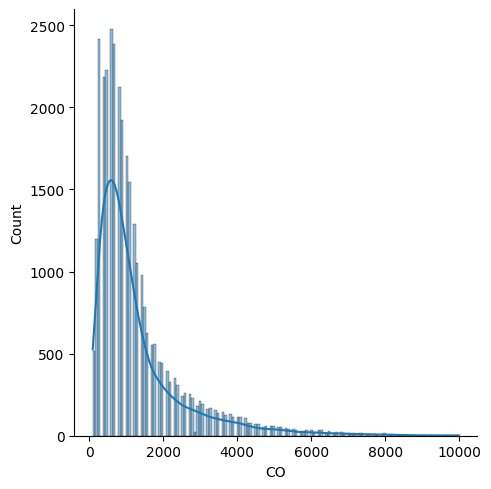

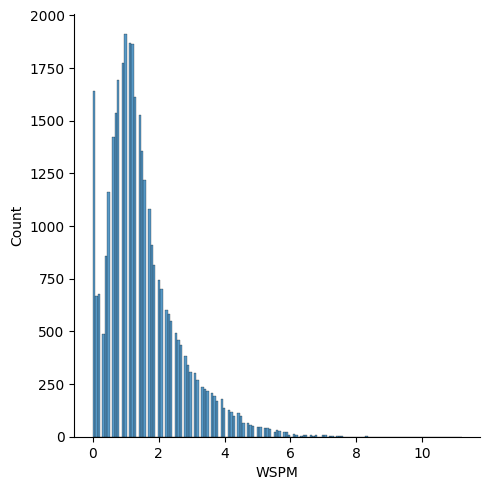

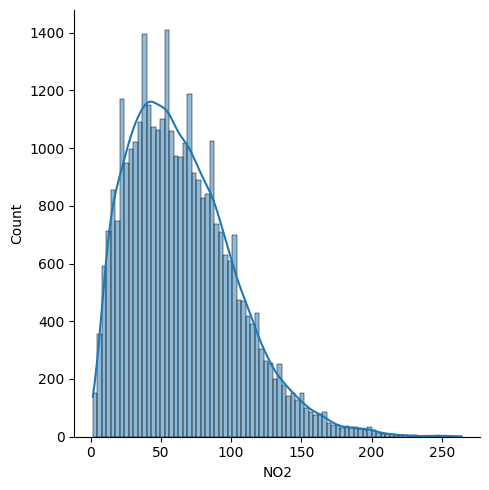

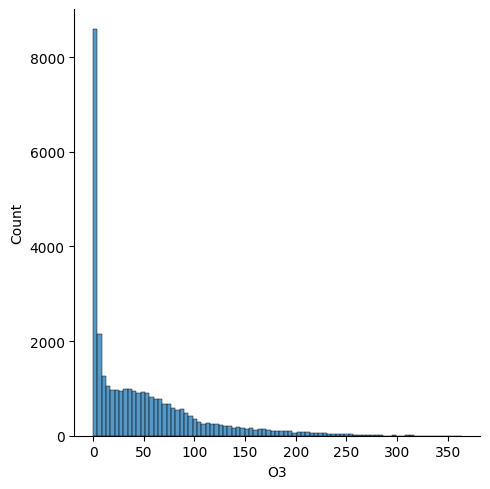

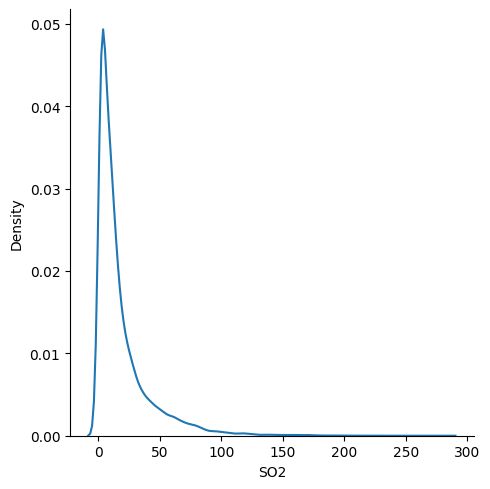

In [4]:
sns.displot(PRSA.RAIN)
sns.displot(PRSA.PRES, kde=True, log_scale=True)
sns.displot(PRSA.CO, kde=True)
sns.displot(PRSA.WSPM)
sns.displot(PRSA.NO2, kde=True)
sns.displot(PRSA.O3)
sns.displot(PRSA.SO2, kind="kde")

# 2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

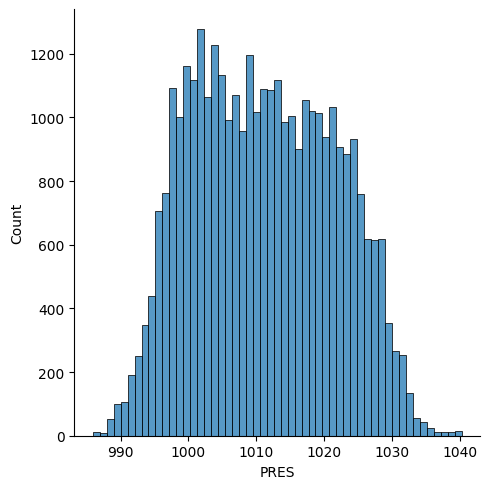

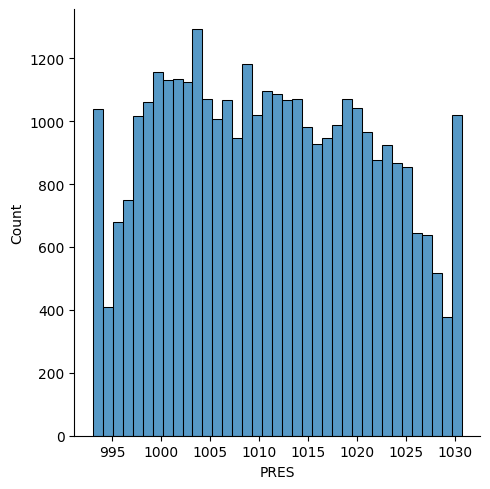

In [8]:
sns.displot(PRSA.PRES)

def adaptivniy_clip(data, cut = 0.02):
    data_copy = data.copy()
    top = data_copy.quantile(1 - cut) 
    down = data_copy.quantile(cut)
    data_copy[data_copy <= down] = down
    data_copy[data_copy >= top] = top
    return data_copy

sns.displot(adaptivniy_clip(PRSA.PRES))

# 3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

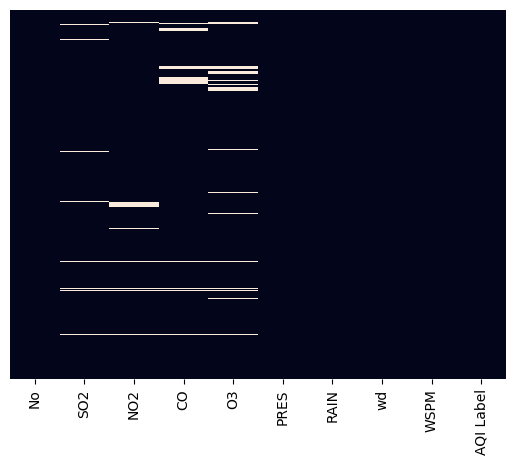

In [9]:
sns.heatmap(PRSA.isnull(), yticklabels=False, cbar=False)
plt.show()

## Попробуем просто удалить

Проверим пропуски:


No              0
SO2           281
NO2           702
CO           1028
O3           1300
PRES            0
RAIN            0
wd              0
WSPM            0
AQI Label       0
dtype: int64

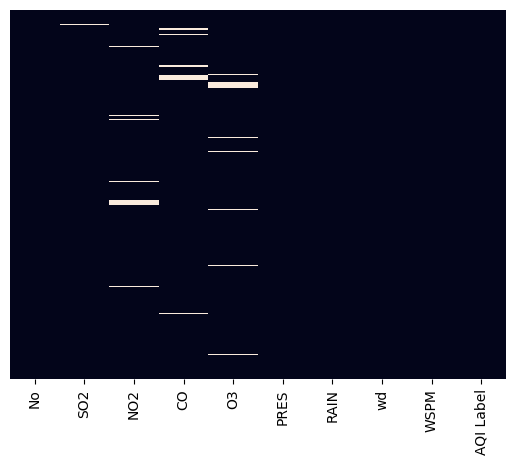

In [12]:
nan = PRSA.isnull().sum(axis=1)
PRSA = PRSA.drop(nan[nan >= 2].index, axis=0)

print('Проверим пропуски:')
display(PRSA.isnull().sum())

sns.heatmap(PRSA.isnull(), yticklabels=False, cbar=False)
plt.show()

## заменим на среднее

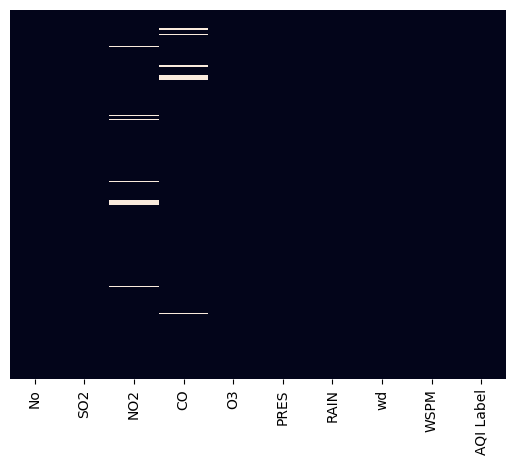

In [17]:
PRSA.SO2 = PRSA.SO2.fillna(PRSA.PRES.mean())

filler = PRSA.O3[PRSA.O3.isna()]
filler = PRSA.O3[~PRSA.O3.isna()].sample(n=len(filler)).set_axis(filler.index)
PRSA.O3 = PRSA.O3.fillna(filler)

sns.heatmap(PRSA.isnull(), yticklabels=False, cbar=False)
plt.show()

In [22]:
print(f'Оставшийся процент пропусков = {PRSA.isnull().sum().sum()/PRSA.shape[0]/PRSA.shape[1] * 100 :.3f}%')

Оставшийся процент пропусков = 0.506%


# 4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

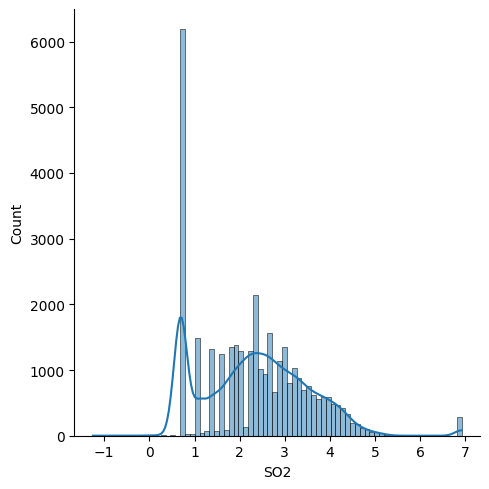

In [29]:
PRSA.SO2 = np.log(PRSA.SO2)
sns.displot(PRSA.SO2, kde=True)

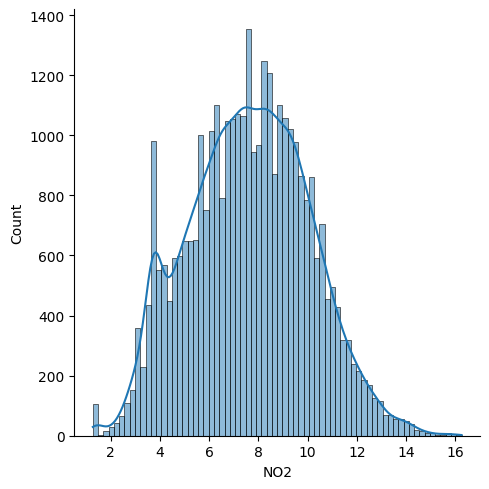

In [30]:
PRSA.NO2 = np.sqrt(PRSA.NO2) 
sns.displot(PRSA.NO2, kde=True) # 

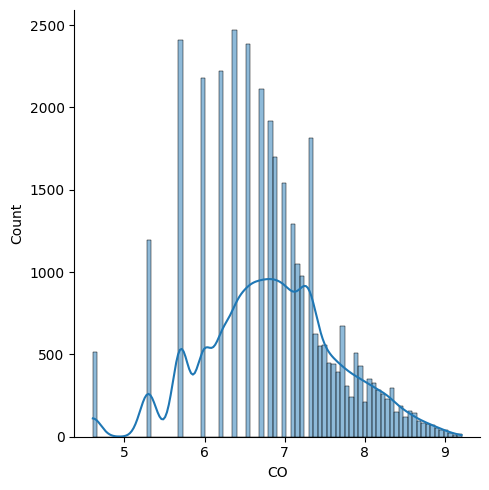

In [31]:
PRSA.CO = np.log(PRSA.CO)
sns.displot(PRSA.CO, kde=True)

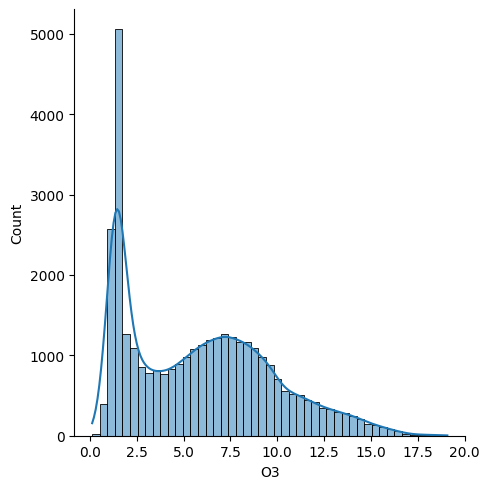

In [32]:
PRSA.O3 = np.sqrt(PRSA.O3)
sns.displot(PRSA.O3, kde=True) #

# 5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

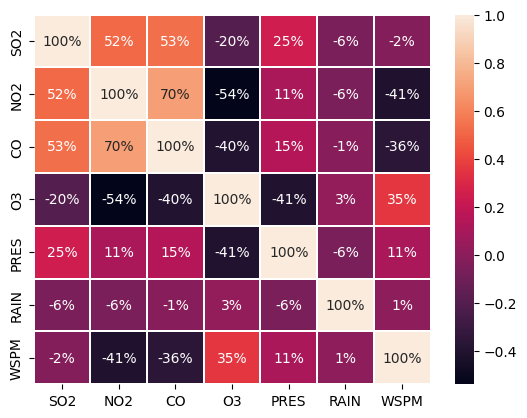

In [36]:
sns.heatmap(PRSA.loc[:, ["SO2", "NO2", "CO", "O3", "PRES", "RAIN", "WSPM"]].corr(), annot=True, fmt="0.0%", linewidth=0.05)
plt.show()

# 6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

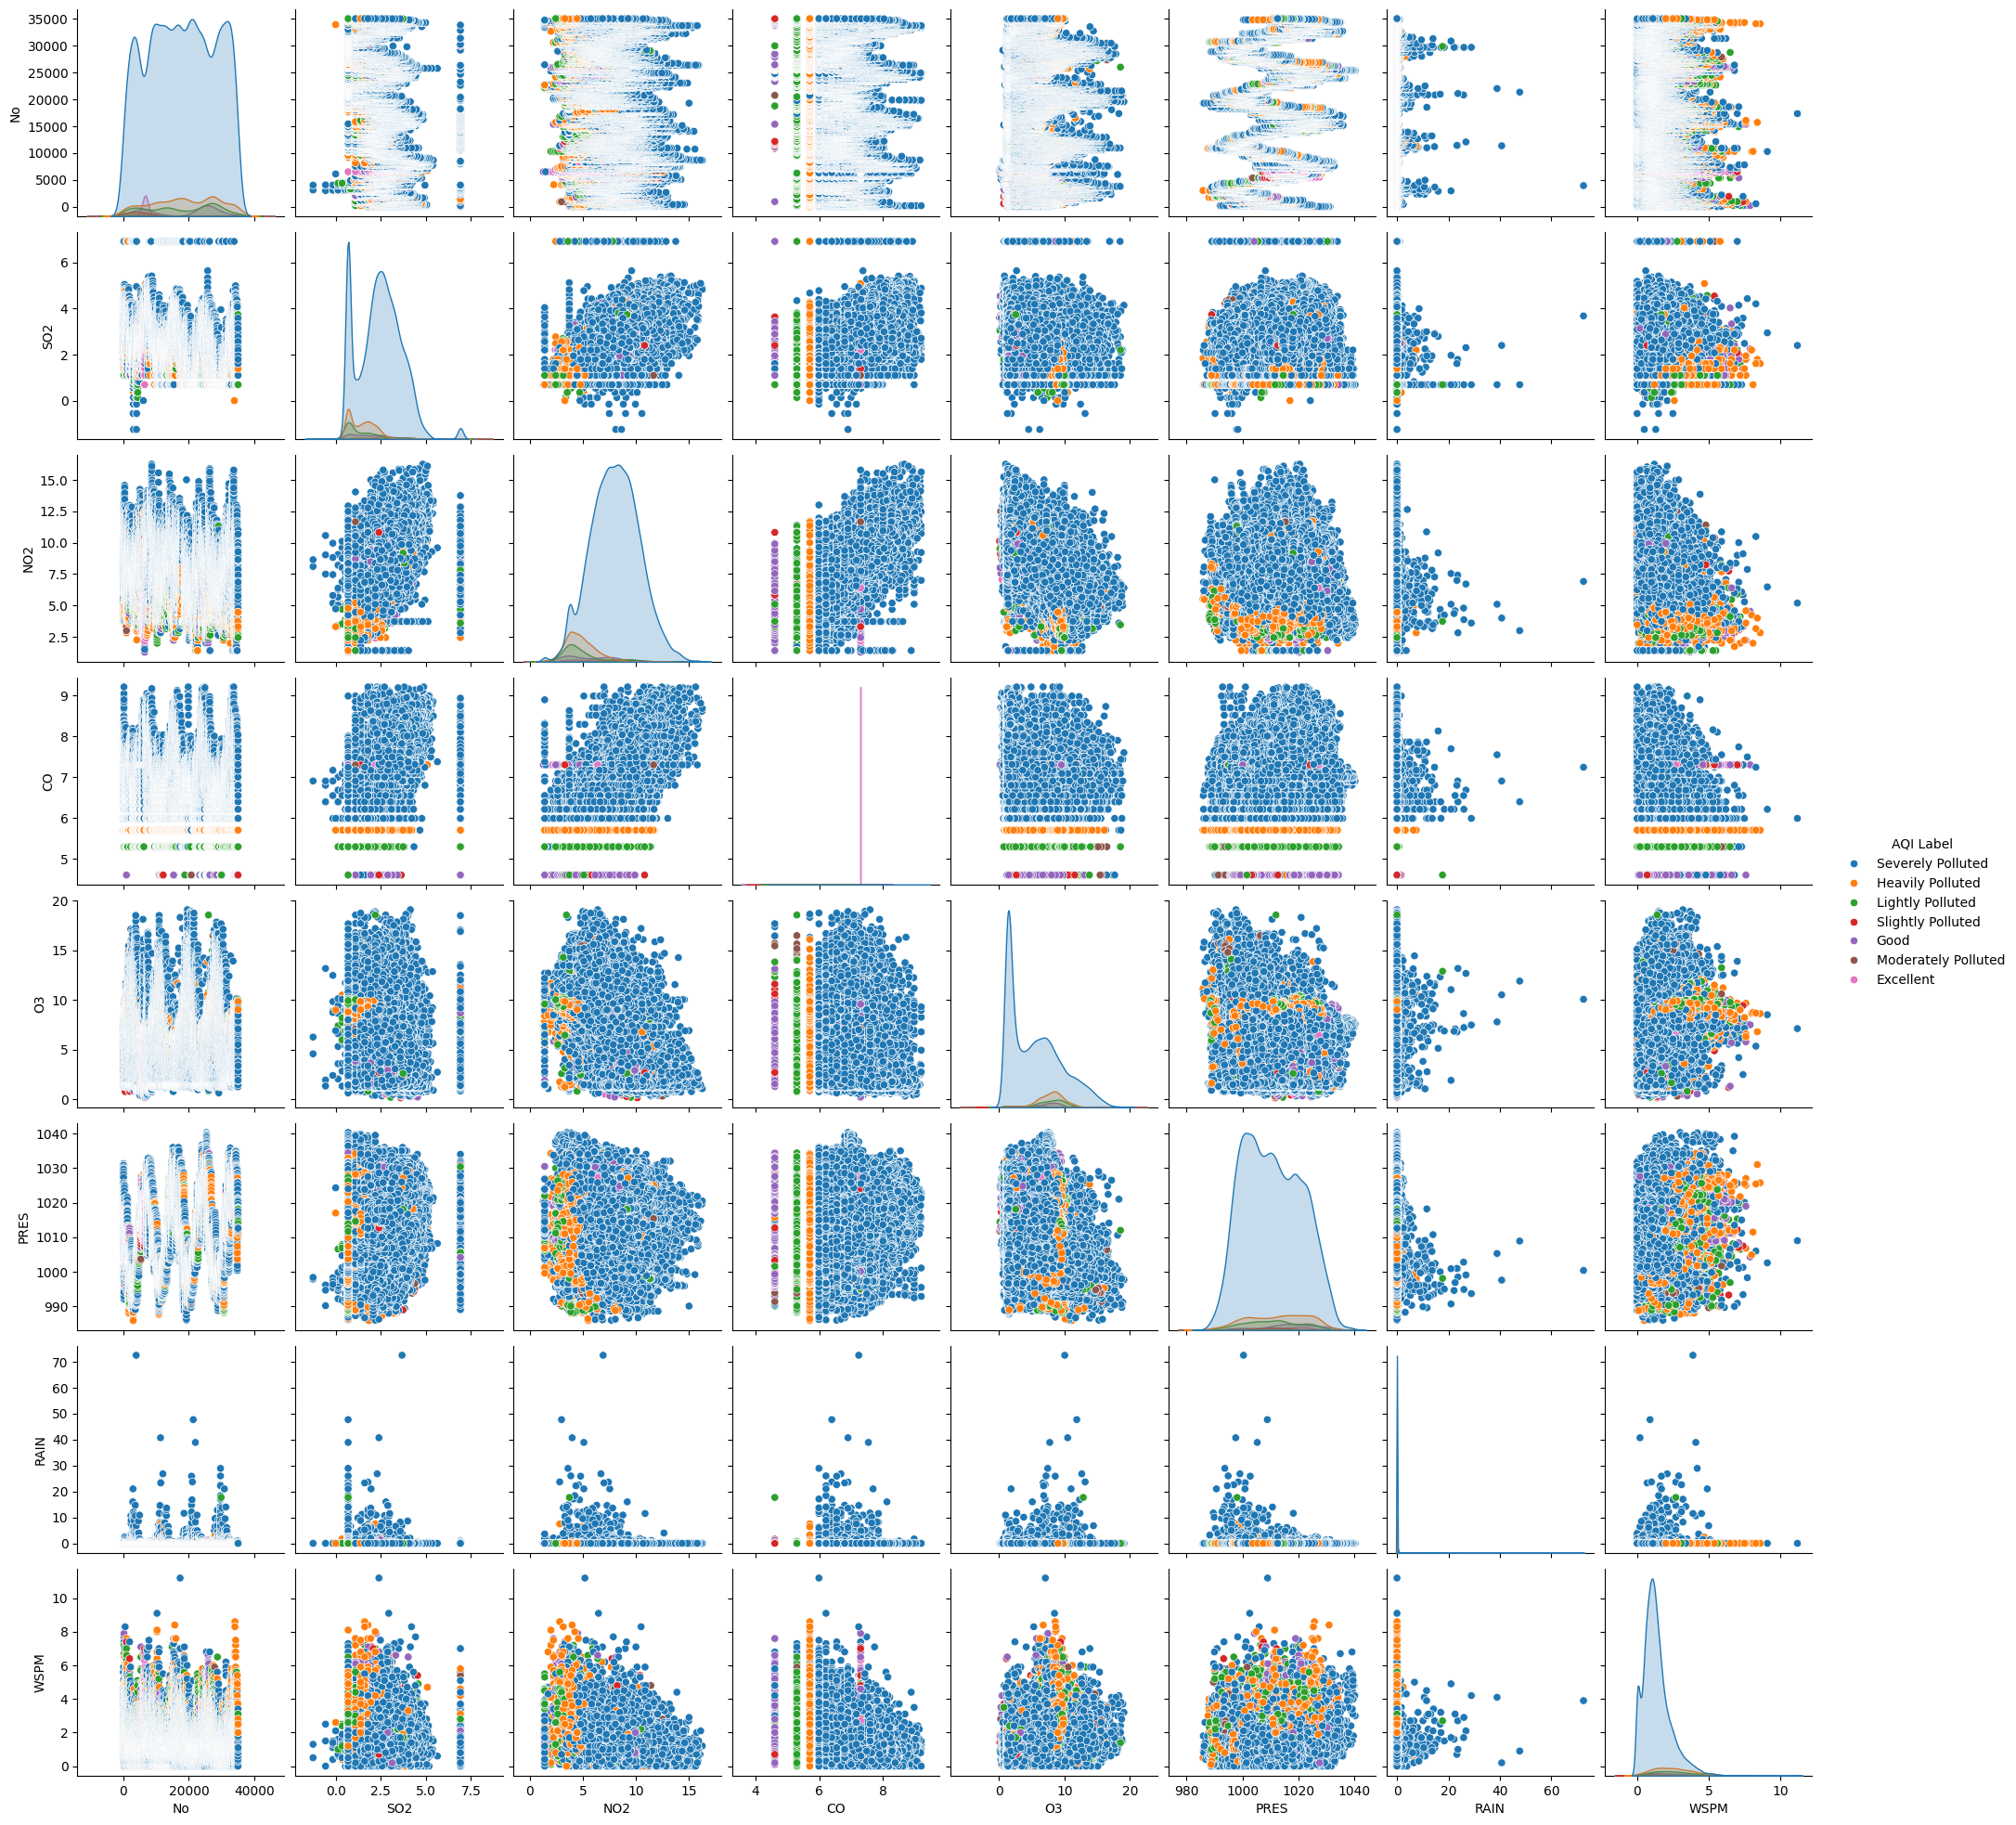

In [37]:
sns.pairplot(PRSA, hue='AQI Label')

# 7. В данной работе проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (логит регрессия, дерево решений или случайный лес).

In [42]:
X, y = PRSA.iloc[:, :-1].copy(), PRSA.iloc[:, -1].copy()

ohe_machine = OneHotEncoder(drop="first").fit(pd.DataFrame(X.loc[:, "wd"]))
new_wd = pd.DataFrame(ohe_machine.transform(pd.DataFrame(X.loc[:, "wd"])).toarray(), columns=ohe_machine.get_feature_names_out())

X = X.drop("wd", axis=1)
X = pd.DataFrame(np.hstack([X, new_wd]), columns=np.hstack([X.columns, ohe_machine.get_feature_names_out()]))
X = X.drop("wd_unknown", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier().fit(X_train, y_train)
np.mean(cross_val_score(model, X, y, scoring="f1_macro"))

0.5365510963991549

In [43]:
PRSA_old = pd.read_csv(os.path.join(data_dir,"PRSA_Data.csv"), index_col=0)
PRSA_old[PRSA_old == -1] = np.nan

X, y = PRSA_old.iloc[:, :-1].copy(), PRSA_old.iloc[:, -1].copy()

ohe_machine = OneHotEncoder(drop="first").fit(pd.DataFrame(X.loc[:, "wd"]))
new_wd = pd.DataFrame(ohe_machine.transform(pd.DataFrame(X.loc[:, "wd"])).toarray(), columns=ohe_machine.get_feature_names_out())

X = X.drop("wd", axis=1)
X = pd.DataFrame(np.hstack([X, new_wd]), columns=np.hstack([X.columns, ohe_machine.get_feature_names_out()]))
X = X.drop("wd_unknown", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier().fit(X_train, y_train)
np.mean(cross_val_score(model, X, y, scoring="f1_macro"))

0.5544495671633674

Не то, чтобы большой прирост